In [2]:
from langgraph.graph import StateGraph,END,START
from typing import TypedDict

In [ ]:
class QuadraticInput(TypedDict):
    a: float
    b: float
    c: float
    

    equation: str
    desrimination: float
    result: str
    

In [21]:
def show_equation(state:QuadraticInput)->QuadraticInput:
    state['equation']=f"{state['a']}x^2{state['b']}x{state['c']} = 0"
    return state


def calculate_disrimination(state:QuadraticInput)->QuadraticInput:

    state['desrimination'] = state['b']**2 - 4*state['a']*state['c']
    return state

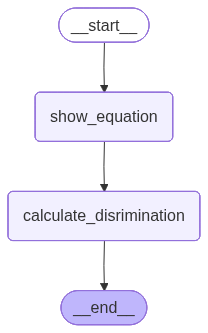

In [22]:
graph=StateGraph(QuadraticInput)
graph.add_node('show_equation',show_equation)
graph.add_node('calculate_disrimination',calculate_disrimination)

# Define Edges

graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_disrimination')
graph.add_edge('calculate_disrimination',END)

graph.compile()


In [23]:
workflow=graph.compile()

initial_state={
    'a': 1,
    'b': -3,
    'c': -2
}
final_state=workflow.invoke(initial_state)
print(final_state)

{'a': 1, 'b': -3, 'c': -2, 'equation': '1x^2-3x-2 = 0', 'desrimination': 17}
